# About the Dataset

This dataset was found on Kaggle: https://www.kaggle.com/datasets/bismasajjad/womens-representation-in-global-stem-education

This dataset provides information from top countries (China, Canada, the US, Germany, India, and Australia) on Female Enrollment and Graduation in four major STEM Fields (Biology, Mathematics, Computer Science, and Engineering). 

It covers Graduation Rate, Enrollment Rate, Gender Gap Index, Year, Country and STEM Field

## Import Packages 

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

## Loading in the Data

In [8]:
## Loading the customer data
## set the dataframe

df = pd.read_csv("women_in_stem.csv")

## Top 5 rows of dataframe
df.head()

,Country,Year,Female Enrollment (%),Female Graduation Rate (%),STEM Fields,Gender Gap Index
0,China,2018,20.4,43.2,Engineering,0.52
1,China,2005,35.6,29.3,Mathematics,0.98
2,China,2005,53.7,32.4,Biology,0.60
3,Germany,2007,65.0,63.6,Mathematics,0.69
4,Canada,2010,54.4,28.8,Engineering,0.74


## Checking dataset structure

#### Column and row count

In [9]:
df.shape

(500, 6)

- This dataset contains 500 rows, 6 columns

#### Column Check

In [20]:
df.columns

Index(['Country', 'Year', 'Female Enrollment (%)',
       'Female Graduation Rate (%)', 'STEM Fields', 'Gender Gap Index'],
      dtype='object')

- The columns include data on Country, Year, Female Enrollment (%), Female Graduation Rate (%), STEM Fields, Gender Gap Index

#### Datatype Check

- Checking the data types of each column
- This is also a validity check; ensuring that columns have the correct datatype based off the info recorded

In [29]:
df.dtypes

Country                        object
Year                            int64
Female Enrollment (%)         float64
Female Graduation Rate (%)    float64
STEM Fields                    object
Gender Gap Index              float64
dtype: object

#### Dataset characteristics

In [62]:
df.info ## more look into the data

<bound method DataFrame.info of        Country  Year  Female Enrollment (%)  Female Graduation Rate (%)  \
0        China  2018                   20.4                        43.2   
1        China  2005                   35.6                        29.3   
2        China  2005                   53.7                        32.4   
3      Germany  2007                   65.0                        63.6   
4       Canada  2010                   54.4                        28.8   
..         ...   ...                    ...                         ...   
495  Australia  2016                   37.2                        50.1   
496      India  2010                   59.1                        61.2   
497    Germany  2010                   34.7                        34.2   
498  Australia  2011                   61.2                        39.9   
499      India  2008                   27.6                        49.1   

          STEM Fields  Gender Gap Index  
0         Engineering    

In [63]:
df.describe() ## only includes numeric columns

,Year,Female Enrollment (%),Female Graduation Rate (%),Gender Gap Index
count,500.000000,500.000000,500.000000,500.000000
mean,2011.418000,43.939800,36.715200,0.745980
std,7.187112,14.316864,15.964231,0.138183
min,2000.000000,20.100000,10.100000,0.500000
25%,2005.000000,31.575000,23.150000,0.630000
50%,2011.000000,43.500000,35.900000,0.750000
75%,2018.000000,56.500000,50.425000,0.860000
max,2023.000000,69.500000,64.900000,1.000000


## Data Quality Checks

#### Completeness Check
- Missing value (null) check

In [10]:
## Checking for NaN's --> summing for each column
df.isna().sum()

Country                       0
Year                          0
Female Enrollment (%)         0
Female Graduation Rate (%)    0
STEM Fields                   0
Gender Gap Index              0
dtype: int64

- This dataset shows no null/missing values across all columns and rows
- Completeness doesnt seem to be an issue; However, this doesnt conclude the dataset is extending across all data quality dimensions 

#### Uniqueness Check
- Checking if values are unique (and/or unique when supposed to be)

In [66]:
df.duplicated().sum() ## duplicate check

np.int64(0)

- No duplicated rows in this data

#### Validity Check

- Checking percent rows if there are numbers outside the range of 0-100%
- Checking index column values are between 0-1

In [26]:
## Defining/naming the percent columns
percent_cols = ["Female Enrollment (%)", "Female Graduation Rate (%)"]

for cols in percent_cols:
    out_of_range = df[(df[c] < 0)] | df[(df[c] > 100)] ## checks the data within a specific range
    print(cols, "Out of range rows:", len(out_of_range)) ## prints nicely the info given (provides context)

Female Enrollment (%) Out of range rows: 0
Female Graduation Rate (%) Out of range rows: 0


- No invalid values recorded in this data set
- percent values lower than 0% and higher than 100%

In [64]:
## Checking Gender gap index 

gender_gap_out = df[(df["Gender Gap Index"] < 0) | (df["Gender Gap Index"] > 1)] ## setting requirements (0-1)
print("Gender Gap Index rows out of range:", len(gender_gap_out)) ## printing out rows out of range with context

Gender Gap Index rows out of range: 0


- No invalid values inputted in this column 
- Invalid values would include (if present) a gender gap index value outside the range 0-1

#### Consistency Check
- Checking if Female Graduation and Female enrollment are related
- This is a consistency check because I'd assume that enrollment is related with graduation (with exceptions of the assumption that not everyone who enrolls, graduates)
- Checking if theres a reasonable gap

In [65]:
grad_minus_enroll = (df["Female Graduation Rate (%)"] - df["Female Enrollment (%)"])
grad_minus_enroll.describe() ## Describes stats of grad minus enroll 

count    500.000000
mean      -7.224600
std       21.270204
min      -55.100000
25%      -23.000000
50%       -7.850000
75%        7.750000
max       43.000000
dtype: float64

##### What this implies
- On average (mean) graduation rate is around 7% lower than enrollment 
- This is normal, as not everyone who enrolls graduates
- 25% of rows have a difference less than or equal to -23%
- This gap is larger, but could imply dropout rates higher in some cases
- The min (greatest negative difference) is at -55.10%
- the max (greatest positive difference) is at 43%
- This could be seen as odd and open for interpretation (could be a difference in how data was collected in a case) 

## Data Summaries

### Describing stats for the whole data set (numeric & non-numeric)

In [67]:
df.describe(include = "all").round(2) ## describe function including numberic and non-numeric columns 

,Country,Year,Female Enrollment (%),Female Graduation Rate (%),STEM Fields,Gender Gap Index
count,500,500.00,500.00,500.00,500,500.00
unique,6,NaN,NaN,NaN,4,NaN
top,China,NaN,NaN,NaN,Mathematics,NaN
freq,88,NaN,NaN,NaN,137,NaN
mean,NaN,2011.42,43.94,36.72,NaN,0.75
std,NaN,7.19,14.32,15.96,NaN,0.14
min,NaN,2000.00,20.10,10.10,NaN,0.50
25%,NaN,2005.00,31.58,23.15,NaN,0.63
50%,NaN,2011.00,43.50,35.90,NaN,0.75
75%,NaN,2018.00,56.50,50.42,NaN,0.86


#### Some info to take from this:
- Data includes years 2000-2023, 2011 being the average
- China (top) appears the most at 88 times (freq)
- Mathematics appears the most at 137
- 500 rows of data
- 6 countries, 4 STEM field 

### Enrollment % by Year

In [68]:
df.groupby("Year")["Female Enrollment (%)"].mean() ## calculating average enrollment by year 

Year
2000    46.563636
2001    42.673684
2002    44.142308
2003    44.939130
2004    45.962500
2005    44.640000
2006    43.286364
2007    43.633333
2008    37.168750
2009    44.783333
2010    47.318182
2011    41.562500
2012    41.940000
2013    46.246667
2014    43.294444
2015    43.595000
2016    39.369565
2017    47.466667
2018    47.275000
2019    47.513636
2020    44.894118
2021    44.887500
2022    42.644828
2023    40.627586
Name: Female Enrollment (%), dtype: float64

#### Some info to take from this:
- Female enrollment averages by year
- Enrollment averages tend to stay in the high 30's and low to mid 40's
- Enrollment is higher from 2017-2019, almost reaching 48%

### Enrollment by STEM Fields

In [69]:
df.groupby("STEM Fields")["Female Enrollment (%)"].mean() ## average enrollment by STEM field

STEM Fields
Biology             42.929412
Computer Science    43.082143
Engineering         44.011364
Mathematics         45.449635
Name: Female Enrollment (%), dtype: float64

#### Info to take from this:
- STEM fields involve Mathematics, Computer science, Biology, Engineering
- Biology has the lowest average
- Mathematics has the highest average
- all 4 range in the low to mid 40's

### Enrollment & Graduation Rate by STEM Field

In [70]:
df.groupby("STEM Fields")[["Female Enrollment (%)", "Female Graduation Rate (%)"]].mean().sort_values("Female Enrollment (%)", ascending = False) 
## Sorts female enrollment high-low 

,Female Enrollment (%),Female Graduation Rate (%)
STEM Fields,,
Mathematics,45.449635,35.448175
Engineering,44.011364,38.183333
Computer Science,43.082143,37.461607
Biology,42.929412,35.842857


#### Info to take:
- Mathematics has the highest enrollment rate but the lowest graduation rate, indicating a larger gap
- Engineering has a slightly lower enrollment rate than mathematics but the highest graduation rate
- Computer science has moderate rates in both enrollment and graduation
- Biology has the lowest enrollment rate and a graduation rate of 35.8%
- There are differences across fields but nothing extreme

### Enrollment & Graduation by Country

In [71]:
## grouping by country
df.groupby("Country")[[
    "Female Enrollment (%)",
    "Female Graduation Rate (%)"]].mean().sort_values("Female Enrollment (%)", ascending = False) ## sorting enrollment high-low

,Female Enrollment (%),Female Graduation Rate (%)
Country,,
USA,45.715854,35.995122
Canada,44.955814,38.072093
Australia,44.035632,37.231034
China,43.375000,37.431818
India,42.784146,35.902439
Germany,42.648000,35.396000


#### Info to take:
- USA has the highest enrollment rate but one of the lowest graduation rates
- Germany and India have the lowest enrollment and graduation rates
- Graduation rates across all countries are lower than the corresponding enrollment rates

#### AI Discolsure
- AI disclosure: In the above codes, I asked ChatGPT for what needs to be added to the code to change the sort of the values displayed (sort_values("Female Enrollment (%)", ascending = False)
- For a cleaner look showing which countries are highest to lowest in Female Enrollment (%)

## Graphs & Visuals

### Bar Graph

#### Average Female Enrollment by STEM Field

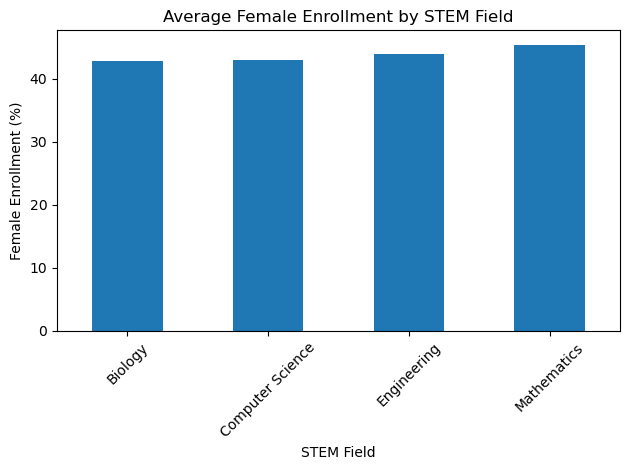

In [73]:
enrollment_by_field = df.groupby("STEM Fields")["Female Enrollment (%)"].mean() ## grouping enrollment by field

enrollment_by_field.plot(kind="bar") ## bar chart

## naming and labelling chart
plt.title("Average Female Enrollment by STEM Field")
plt.ylabel("Female Enrollment (%)")
plt.xlabel("STEM Field")

## layout/structuring
plt.xticks(rotation=45) ## rotates the x-axis labels by 45 --> cleaner look
plt.tight_layout() ## adjusting spacing

## display
plt.show()

#### Insights:
- Enrollment is similar across fields (no field has a significantly larger enrollment %)
- Mathematics has the largest enrollment %, indicating higher participation
- Biology has the lowest enrollment rate, but not significantly smaller

### Scatter Plot

#### Scatter plot showing Female Enrollment vs Graduation Rate by Stem field
- scatter plot is coloured, colours represent the STEM fields 
- X axis (female enrollment), y axis (female graduation)

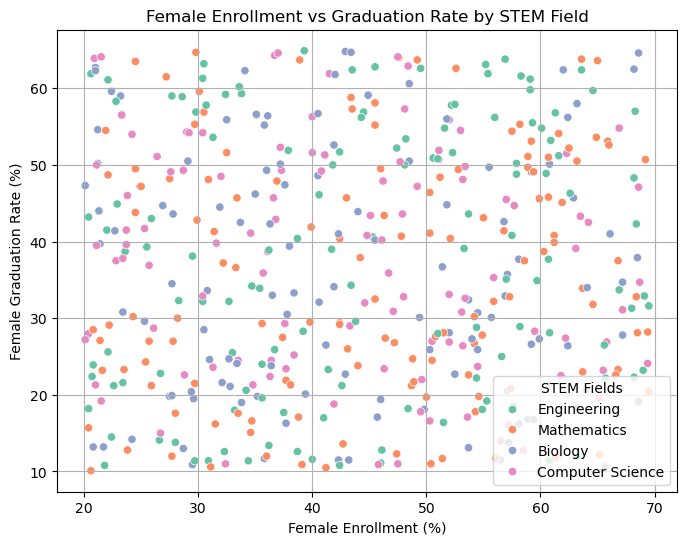

In [19]:
plt.figure(figsize=(8, 6))

## this uses seaborn instead of just matplotlib --> adding colour to show potential relationship
sns.scatterplot(x="Female Enrollment (%)", y="Female Graduation Rate (%)", hue="STEM Fields", data=df, palette="Set2")

## labelling and naming 
plt.title("Female Enrollment vs Graduation Rate by STEM Field")
plt.xlabel("Female Enrollment (%)")
plt.ylabel("Female Graduation Rate (%)")
plt.grid(True)

## shows legend
plt.legend(title="STEM Fields")

## Display
plt.show()

### Insights
- Fields overlap heavily, no field has a clear pattern of enrollment vs graduation
- High enrollment does not consistently lead to higher graduation rates
- Retention patterns spread across all STEM Fields, not significant in one
- Some cases show high enrollment with low graduation rate, this could indicate retention challenges in some cases
- This graph has colour so widely spread, no indication that STEM Field alone explain differences in rates
- This may mean Country or other factors can play in

### Scatter Plot without colour
- x axis (Female Enrollment), y-axis (Female Graduation)

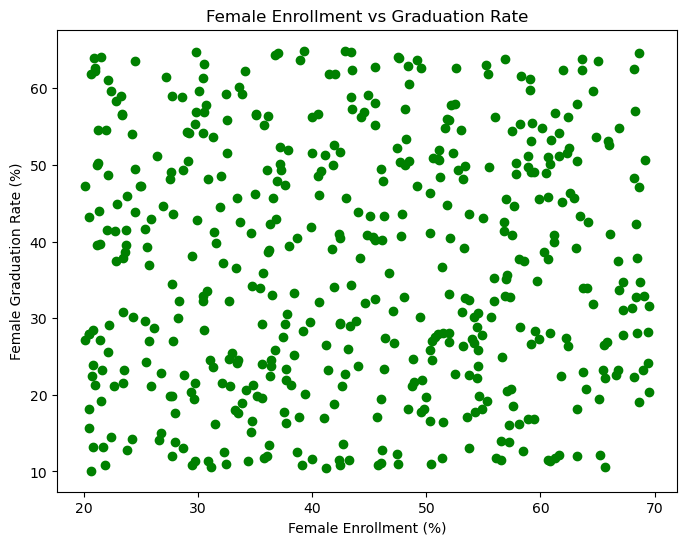

In [58]:
plt.figure(figsize=(8, 6))

## scatter plot 
plt.scatter(df["Female Enrollment (%)"],
    df["Female Graduation Rate (%)"], color = 'green')

## labels and naming
plt.xlabel("Female Enrollment (%)")
plt.ylabel("Female Graduation Rate (%)")
plt.title("Female Enrollment vs Graduation Rate")

## display
plt.show()

### Insights
- Similarly to the scatter with colour, dots are spread throughout with no strong indication that high enrollment does not necessarily lead to higher graduation rates
- Factors beyond enrollment can effect graduation rate
- This distribution can indicate that completion varies widely with country, field and years
- visualizes gaps that were observed in the consistency check between enrollment and graduation rates

### Scatter Plot with Line

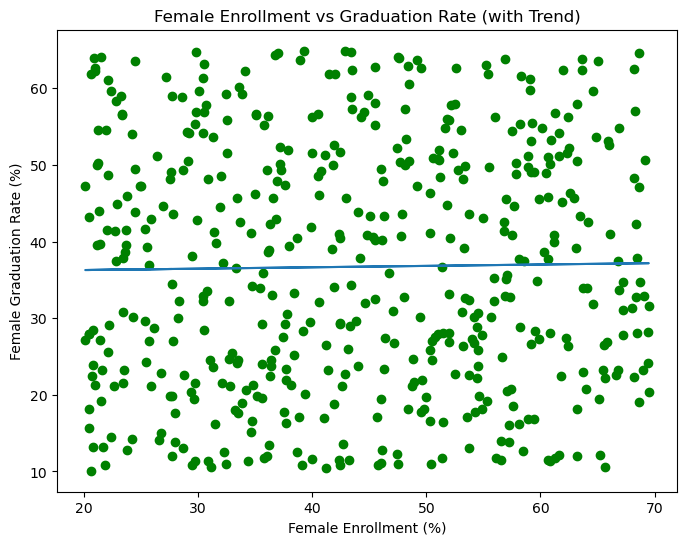

In [74]:
## Choosing variables
x = df["Female Enrollment (%)"]
y = df["Female Graduation Rate (%)"]

## using numpy, slope, intercept
## creating a trend line
m, b = np.polyfit(x, y, 1)

## structure
plt.figure(figsize=(8, 6))

## defining labels, names and caracteristics of graph
plt.scatter(x, y, color = 'Green')
plt.plot(x, m*x + b) #3 slope-intercept formula
plt.xlabel("Female Enrollment (%)")
plt.ylabel("Female Graduation Rate (%)")
plt.title("Female Enrollment vs Graduation Rate (with Trend)")

## display
plt.show()

### Insights
- This graph is the same as the scatter plot above (without line)
- Insights remain the same
- The line indicates no strong linear pattern in enrollment vs graduation relationships

### Trend
#### Female Enrollment by Year

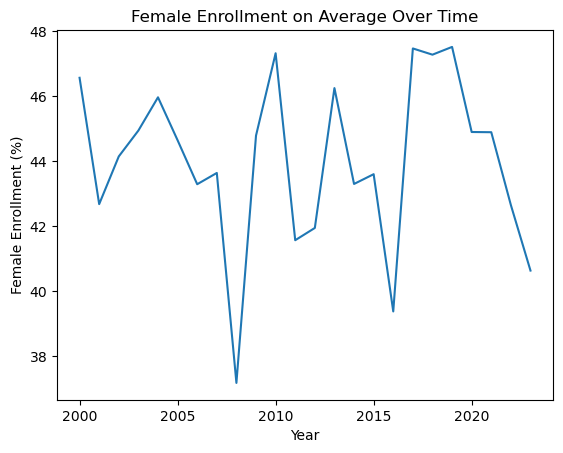

In [43]:
## Line graph to show enrollment trend over time

trend = df.groupby("Year")["Female Enrollment (%)"].mean() ## averaging enrollment % and grouping by year

plt.figure()
plt.plot(trend) ## line plot

## Titles and labels
plt.title("Female Enrollment on Average Over Time")
plt.xlabel("Year")
plt.ylabel("Female Enrollment (%)")

## Display
plt.show()

### Insights:
- Average enrollment fluctuates over time, instead of steadily 
- There is a dip in between 2005-2010, indicating lower enrollment rates in this time
- Enrollment rate recovers and reaches peaks from 2015-2020
- After 2020 it starts to decrease slightly

## Additional Analysis

#### Correlation between Grad Rate, Enroll Rate, Gender Gap Index

In [45]:
df[["Female Enrollment (%)", "Female Graduation Rate (%)", "Gender Gap Index"]].corr() 

,Female Enrollment (%),Female Graduation Rate (%),Gender Gap Index
Female Enrollment (%),1.000000,0.016205,-0.080639
Female Graduation Rate (%),0.016205,1.000000,0.027454
Gender Gap Index,-0.080639,0.027454,1.000000


### Insights
- Enrollment amd graduation rate show very close to 0, showing no linear relationship with each other
- Circles back to how high enrollment does not equal higher graduation
- Gender gap Index and Enrollment have a slight negative relationship, meaning that gender gap index does not strongly relate to enrollment rates
- Overall correlations across these 3 topics are very small (close to 0), meaning no variable strongly impacts the others